<a href="https://colab.research.google.com/github/deswitanaf/Statistika-Multivariat/blob/main/StatmulTURF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis TURF untuk Menentukan Kombinasi Karakteristik Konsumen yang Paling Potensial dalam Pembelian Mobil

Industri otomotif menghadapi persaingan yang sangat ketat, sehingga perusahaan harus memahami siapa calon pembeli atau yang akan mengajukan kreadit yang memiliki berpotensial besar. Strategi pemasaran umum seringkali tidak berhasil karena tidak semua konsumen memiliki kebutuhan, preferensi, dan daya beli yang sama. Oleh karena itu, perusahaan harus melakukan segmentasi pasar berdasarkan data sebelumnya pada pelanggan dan mengidentifikasi karakteristik konsumen secara rinci untuk meningkatkan efektivitas pemasaran dan promosi produk. Melalui data konsumen yang mengajukan kreadit atau pembelian cash dapat dilihat kateristik pembeli dari mobil perusahaan dan dapat membuat perusahaan menyesuaikan dengan karakteristik tersebut agar penjualan dan pengajuan kreadit pada mobil menjadi naik.

Maka saya melakukan percobaan menggunakan metode TURF untuk melihat kombinasi karakteristik konsumen yang paling potensial dalam pembelian mobil. Mengapa saya menggunakan metode tersebut, dikarenakan dengan metode tersebut saya dapat melihat jangkauan pasar berdasarkan mobil yang dimiliki perusahaan agar tumpang tindih minimal. Dalam pemasaran mobil penting untuk memastikas iklan atau pesan tidak hanya sampai ke bebrapa orang melainkan diinginkan pesan tersebut sampai ke banyak orang yang memiliki kesamaan karakteristik yang sudah dibuat oleh perusahaan dan ingin membeli atau mengambil kredit di perusahaan mobil tersebut. Sehingga anggaran yang sudah dialokasi dapagt meningkatkan penjualan. Mengapa saya tidak mengelompokan konsumen menggunakan metode segmentasi biasa dikarenakan TURF dapat memberikan rekomendari strategis tentang karakteristik mana yang paling optiomal dalam menjangkau konsumen baru secara keseluruhan. TURF juga dapat mengambil keputusan berbasis nyata, bukan hanya beriisi asumsi, dikarenakan metris seperti reach, frequency, dan overlap dihitung secara eksplisit dalam membentuk dasar strategi pemasaran yang lebih terukur dan tepat sasaran.

Asumsi utama dalam percobaan ini yaitu Karakteristik konsumen terdahulu dapat dikombinasikan sedemikian sihingga dapat menghasilkan jangkauan pasar maksimal sehingga pemasaran dapat diarahkan secara yang lebih efektif.
Diasumsikan pula penggunaan matriks eksplisit seperti reach, frequency, dan overlap  keakuratannya dibandingkan metode segmentasi tradisional lebih akurat dalam mempresentasikan potensi pembeli berdasarkan karakteristik pembeli sebelumnya.





#Import Library

In [1]:
#Install Library
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 3.7 MB/s eta 0:00:00


In [2]:
#Import Library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pingouin as pg
from scipy.spatial.distance import mahalanobis
from numpy.linalg import inv
from scipy.stats import chi2
from sklearn.covariance import MinCovDet

#Data

In [44]:
data = pd.read_csv('/content/Car Ownership.csv', sep=None, engine='python')
data

,Occupation,Monthly Income,Credit Score,Years of Employment,Finance Status,Finance History,Car,Number of Children
0,Teacher,40000,750.0,10,Good,No issues,Yes,2
1,Engineer,60000,800.0,8,Good,No issues,Yes,1
2,Nurse,25000,650.0,5,Fair,Late payment 2 months ago,No,0
3,Doctor,80000,900.0,12,Excellent,No issues,Yes,3
4,Businessman,100000,700.0,15,Good,Late payment 6 months ago,Yes,2
...,...,...,...,...,...,...,...,...
495,Project Manager,"$7,000",730.0,5 years,Stable,No significant issues,Yes,0
496,Chef,"$4,500",680.0,4 years,Stable,No significant issues,Yes,0
497,Interior Designer,"$5,500",690.0,4 years,Stable,No significant issues,Yes,1
498,Medical Assistant,"$3,500",640.0,3 years,Stable,No significant issues,No,1


#Prepocessing

In [37]:
# Menampilkan baris yang memiliki nilai kosong (NaN) di setidaknya satu kolom
baris_kosong = data[data.isnull().any(axis=1)]
print(baris_kosong)

Empty DataFrame
Columns: [Occupation	Monthly Income	Credit Score	Years of Employment	Finance Status	Finance History	Car	Number of Children]
Index: []


In [5]:
df_bersih = data.dropna(how='all')
df_bersih

,Occupation,Monthly Income,Credit Score,Years of Employment,Finance Status,Finance History,Car,Number of Children
0,Teacher,40000,750.0,10,Good,No issues,Yes,2
1,Engineer,60000,800.0,8,Good,No issues,Yes,1
2,Nurse,25000,650.0,5,Fair,Late payment 2 months ago,No,0
3,Doctor,80000,900.0,12,Excellent,No issues,Yes,3
4,Businessman,100000,700.0,15,Good,Late payment 6 months ago,Yes,2
...,...,...,...,...,...,...,...,...
495,Project Manager,"$7,000",730.0,5 years,Stable,No significant issues,Yes,0
496,Chef,"$4,500",680.0,4 years,Stable,No significant issues,Yes,0
497,Interior Designer,"$5,500",690.0,4 years,Stable,No significant issues,Yes,1
498,Medical Assistant,"$3,500",640.0,3 years,Stable,No significant issues,No,1


In [6]:
df_bersih['Number of Children'] = df_bersih['Number of Children'].replace('', 0)   # Ganti string kosong
df_bersih['Number of Children'] = df_bersih['Number of Children'].fillna(0)         # Ganti NaN dengan 0
df_bersih['Number of Children'] = df_bersih['Number of Children'].replace('na', 0)   # Ganti na dengan 0

df_bersih

<ipython-input-6-5922f7c23fe4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bersih['Number of Children'] = df_bersih['Number of Children'].replace('', 0)   # Ganti string kosong
<ipython-input-6-5922f7c23fe4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bersih['Number of Children'] = df_bersih['Number of Children'].fillna(0)         # Ganti NaN dengan 0
<ipython-input-6-5922f7c23fe4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,Occupation,Monthly Income,Credit Score,Years of Employment,Finance Status,Finance History,Car,Number of Children
0,Teacher,40000,750.0,10,Good,No issues,Yes,2
1,Engineer,60000,800.0,8,Good,No issues,Yes,1
2,Nurse,25000,650.0,5,Fair,Late payment 2 months ago,No,0
3,Doctor,80000,900.0,12,Excellent,No issues,Yes,3
4,Businessman,100000,700.0,15,Good,Late payment 6 months ago,Yes,2
...,...,...,...,...,...,...,...,...
495,Project Manager,"$7,000",730.0,5 years,Stable,No significant issues,Yes,0
496,Chef,"$4,500",680.0,4 years,Stable,No significant issues,Yes,0
497,Interior Designer,"$5,500",690.0,4 years,Stable,No significant issues,Yes,1
498,Medical Assistant,"$3,500",640.0,3 years,Stable,No significant issues,No,1


In [7]:
# Menampilkan nilai unik di kolom 'Number of Children'
df_bersih['Number of Children'].unique()

array(['2', '1', '0', '3', 0, '4'], dtype=object)

In [8]:
df_bersih['Years of Employment'].unique()

array(['10', '8', '5', '12', '15', '6', '3', '20', '1', '7', '4', '2',
       nan, '3 years', '5 years', '2 years', '7 years', '1 year',
       '4 years', '8 years', '6 years', '2 y', '3 year', '2 year',
       '6 year', '7 y', '10 years', '12 years', '3 y', '9 years',
       '11 years', '7 year', '8 year', '4 year', '5 year'], dtype=object)

In [9]:
# Hapus kata-kata 'years', 'year', 'y' dengan regex, termasuk spasi sebelum kata tersebut
df_bersih['Years of Employment'] = df_bersih['Years of Employment'].str.replace(r'\s*(years|year|y)\b', '', regex=True)
# Ganti string kosong yang tadinya NaN jadi '0'
df_bersih['Years of Employment'] = df_bersih['Years of Employment'].fillna(0)         # Ganti NaN dengan 0


<ipython-input-9-1d86628728dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bersih['Years of Employment'] = df_bersih['Years of Employment'].str.replace(r'\s*(years|year|y)\b', '', regex=True)
<ipython-input-9-1d86628728dd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bersih['Years of Employment'] = df_bersih['Years of Employment'].fillna(0)         # Ganti NaN dengan 0


In [10]:
df_bersih.dtypes

,0
Occupation,object
Monthly Income,object
Credit Score,float64
Years of Employment,object
Finance Status,object
Finance History,object
Car,object
Number of Children,object


In [11]:
#Mengubah type data
# Mengubah kolom 'Penghasilan' jadi tipe integer
df_bersih['Monthly Income'] = pd.to_numeric(df_bersih['Monthly Income'], errors='coerce').fillna(0).astype(int)
df_bersih['Credit Score'] = pd.to_numeric(df_bersih['Credit Score'], errors='coerce').fillna(0).astype(int)
df_bersih['Years of Employment'] = pd.to_numeric(df_bersih['Years of Employment'], errors='coerce').fillna(0).astype(int)
df_bersih['Number of Children'] = pd.to_numeric(df_bersih['Number of Children'], errors='coerce').fillna(0).astype(int)
df_bersih.dtypes

<ipython-input-11-ac55302d4db3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bersih['Monthly Income'] = pd.to_numeric(df_bersih['Monthly Income'], errors='coerce').fillna(0).astype(int)
<ipython-input-11-ac55302d4db3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bersih['Credit Score'] = pd.to_numeric(df_bersih['Credit Score'], errors='coerce').fillna(0).astype(int)
<ipython-input-11-ac55302d4db3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

,0
Occupation,object
Monthly Income,int64
Credit Score,int64
Years of Employment,int64
Finance Status,object
Finance History,object
Car,object
Number of Children,int64


#Kategori Pekerjaan

In [12]:
df_bersih['Occupation'].unique()

array(['Teacher', 'Engineer', 'Nurse', 'Doctor', 'Businessman',
       'Salesperson', 'Entrepreneur', 'Lawyer', 'Accountant',
       'Software Dev', 'Electrician', 'Architect', 'Marketing Exec',
       'Chef', 'Police Officer', 'Real Estate Ag', 'Pilot',
       'Graphic Design', 'Writer', 'Musician', 'Software Developer',
       'Mechanic', 'Marketing', 'Graphic Designer', 'Financial Advisor',
       'Real Estate Agent', 'Construction Worker', 'Designer',
       'Web Developer', 'Account Manager', 'Financial Analyst',
       'Human Resources', 'Plumber', 'Social Worker', 'Data Scientist',
       'Customer Service', 'Veterinarian', 'Web Designer',
       'Insurance Agent', 'Sales Representative', 'Marketing Manager',
       'Software Engineer', 'Dental Hygienist', 'Retail Manager',
       'Personal Trainer', 'Pharmacist', 'Computer Programmer',
       'Physical Therapist', 'Physician', 'Project Manager',
       'Hairdresser', 'Mechanical Engineer', 'IT Manager',
       'Marketing Specia

In [13]:
# Kamus kategori pekerjaan (sudah lengkap)
kategori_pekerjaan = {
    # IT
    'Software Dev': 'IT',
    'Software Developer': 'IT',
    'Software Engineer': 'IT',
    'Web Developer': 'IT',
    'Web Designer': 'IT',
    'Computer Programmer': 'IT',
    'Data Scientist': 'IT',
    'IT Manager': 'IT',
    'IT Consultant': 'IT',
    'IT Support Specialist': 'IT',
    'Data Analyst': 'IT',
    'Software Architect': 'IT',
    'Computer Technician': 'IT',
    'Engineer': 'IT',
    'Electrical Engineer': 'IT',
    'Mechanical Engineer': 'IT',
    'Mechanical Technician': 'IT',
    'Civil Engineer': 'IT',
    'Mechanical Designer': 'IT',

    # Kesehatan
    'Doctor': 'Kesehatan',
    'Nurse': 'Kesehatan',
    'Registered Nurse': 'Kesehatan',
    'Physician': 'Kesehatan',
    'Pharmacist': 'Kesehatan',
    'Physical Therapist': 'Kesehatan',
    'Physical Therapist Assistant': 'Kesehatan',
    'Medical Assistant': 'Kesehatan',
    'Dentist': 'Kesehatan',
    'Nurse Practitioner': 'Kesehatan',
    'Dental Hygienist': 'Kesehatan',
    'Dental Assistant': 'Kesehatan',
    'Physician Assistant': 'Kesehatan',
    'Veterinarian': 'Kesehatan',
    'Veterinarian Technician': 'Kesehatan',
    'Optometrist': 'Kesehatan',
    'Psychologist': 'Kesehatan',
    'Physical Trainer': 'Kesehatan',
    'Personal Trainer': 'Kesehatan',
    'Fitness Instructor': 'Kesehatan',

    # Keuangan
    'Accountant': 'Keuangan',
    'Financial Advisor': 'Keuangan',
    'Financial Analyst': 'Keuangan',
    'Investment Banker': 'Keuangan',
    'Financial Manager': 'Keuangan',
    'Financial Planner': 'Keuangan',
    'Bank Teller': 'Keuangan',
    'Insurance Agent': 'Keuangan',
    'Insurance Underwriter': 'Keuangan',

    # Desain
    'Graphic Design': 'Desain',
    'Graphic Designer': 'Desain',
    'Graphic Artist': 'Desain',
    'Designer': 'Desain',
    'Interior Designer': 'Desain',
    'Fashion Designer': 'Desain',
    'Art Director': 'Desain',
    'Architect': 'Desain',
    'Photographer': 'Desain',
    'Copywriter': 'Desain',

    # Pendidikan
    'Teacher': 'Pendidikan',
    'Elementary School Teacher': 'Pendidikan',
    'Physical Education Teacher': 'Pendidikan',
    'Librarian': 'Pendidikan',

    # SDM
    'HR Manager': 'SDM',
    'HR Generalist': 'SDM',
    'HR Specialist': 'SDM',
    'Human Resources': 'SDM',
    'Human Resources Manager': 'SDM',

    # Kuliner
    'Chef': 'Kuliner',
    'Barista': 'Kuliner',
    'Waiter/Waitress': 'Kuliner',
    'Bartender': 'Kuliner',

    # Penjualan
    'Salesperson': 'Penjualan',
    'Sales Representative': 'Penjualan',
    'Sales Manager': 'Penjualan',
    'Retail Manager': 'Penjualan',
    'Retail Salesperson': 'Penjualan',

    # Marketing
    'Marketing Exec': 'Marketing',
    'Marketing': 'Marketing',
    'Marketing Specialist': 'Marketing',
    'Marketing Manager': 'Marketing',
    'Marketing Analyst': 'Marketing',
    'Marketing Coordinator': 'Marketing',
    'Social Media Manager': 'Marketing',
    'Public Relations': 'Marketing',

    # Bisnis
    'Businessman': 'Bisnis',
    'Entrepreneur': 'Bisnis',
    'Business Owner': 'Bisnis',
    'Business Analyst': 'Bisnis',
    'Management Consultant': 'Bisnis',
    'Project Manager': 'Bisnis',
    'Account Manager': 'Bisnis',
    'Account Executive': 'Bisnis',
    'Office Manager': 'Bisnis',
    'Executive Assistant': 'Bisnis',

    # Layanan Publik
    'Police Officer': 'Layanan Publik',
    'Firefighter': 'Layanan Publik',
    'Pilot': 'Layanan Publik',
    'Flight Attendant': 'Layanan Publik',
    'Social Worker': 'Layanan Publik',
    'Attorney': 'Layanan Publik',
    'Lawyer': 'Layanan Publik',

    # Konstruksi / Teknik
    'Electrician': 'Konstruksi',
    'Plumber': 'Konstruksi',
    'Mechanic': 'Konstruksi',
    'Automotive Mechanic': 'Konstruksi',
    'Carpenter': 'Konstruksi',
    'Construction Worker': 'Konstruksi',

    # Real Estate
    'Real Estate Ag': 'Properti',
    'Real Estate Agent': 'Properti',

    # Hiburan & Kreatif
    'Writer': 'Kreatif',
    'Musician': 'Kreatif',
    'Hairdresser': 'Kreatif',
    'Hair Stylist': 'Kreatif',
    'Event Planner': 'Kreatif',

    # Layanan Pelanggan
    'Customer Service': 'Layanan',
    'Customer Service Rep': 'Layanan',
    'Customer Support': 'Layanan',
}

# Mapping ke kategori
df_bersih['Occupation_Kategori'] = df_bersih['Occupation'].map(kategori_pekerjaan)
df_bersih

<ipython-input-13-8cfd7182e8bb>:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bersih['Occupation_Kategori'] = df_bersih['Occupation'].map(kategori_pekerjaan)


,Occupation,Monthly Income,Credit Score,Years of Employment,Finance Status,Finance History,Car,Number of Children,Occupation_Kategori
0,Teacher,40000,750,10,Good,No issues,Yes,2,Pendidikan
1,Engineer,60000,800,8,Good,No issues,Yes,1,IT
2,Nurse,25000,650,5,Fair,Late payment 2 months ago,No,0,Kesehatan
3,Doctor,80000,900,12,Excellent,No issues,Yes,3,Kesehatan
4,Businessman,100000,700,15,Good,Late payment 6 months ago,Yes,2,Bisnis
...,...,...,...,...,...,...,...,...,...
495,Project Manager,0,730,5,Stable,No significant issues,Yes,0,Bisnis
496,Chef,0,680,4,Stable,No significant issues,Yes,0,Kuliner
497,Interior Designer,0,690,4,Stable,No significant issues,Yes,1,Desain
498,Medical Assistant,0,640,3,Stable,No significant issues,No,1,Kesehatan


In [14]:
df_bersih['Occupation_Kategori'].unique()

array(['Pendidikan', 'IT', 'Kesehatan', 'Bisnis', 'Penjualan',
       'Layanan Publik', 'Keuangan', 'Konstruksi', 'Desain', 'Marketing',
       'Kuliner', 'Properti', 'Kreatif', 'SDM', 'Layanan'], dtype=object)

#Kategori Finance History

In [15]:
df_bersih['Finance History'].unique()

array(['No issues', 'Late payment 2 months ago',
       'Late payment 6 months ago', 'Late payment 3 months ago',
       'Late payment 1 month ago', 'Excellent', 'Poor', 'Good', 'Fair',
       nan, 'No significant issues', 'Missed payments in the past',
       'Late payments', 'Late payment', 'No significant issue',
       'Late payments, collections',
       'Missed payments, collections, charge-offs'], dtype=object)

Saya kelompokkan berdasarkan tingkat risiko atau kondisi keuangan. Dari nilai-nilai pada FInance Histori, agar mempermudah melihat keuaangan pemilik mobil mengelompokkan menjadi tiga kategori utama:

Baik (Tidak ada masalah keuangan)

Cukup (Pernah terlambat bayar tapi tidak berat)

Buruk (Terlambat bayar lebih dari sekali, collections, charge-offs)



In [16]:
kategori_finance = {
    # Kategori Baik
    'No issues': 'Baik',
    'Excellent': 'Baik',
    'Good': 'Baik',
    'Fair': 'Baik',
    'No significant issues': 'Baik',
    'No significant issue': 'Baik',

    # Kategori Cukup
    'Late payment 1 month ago': 'Cukup',
    'Late payment 2 months ago': 'Cukup',
    'Late payment 3 months ago': 'Cukup',
    'Late payment 6 months ago': 'Cukup',
    'Late payment': 'Cukup',
    'Late payments': 'Cukup',

    # Kategori Buruk
    'Missed payments in the past': 'Buruk',
    'Late payments, collections': 'Buruk',
    'Missed payments, collections, charge-offs': 'Buruk',
    'Poor': 'Buruk'
}
# Mapping kategori finance
df_bersih['Finance_History_Kategori'] = df_bersih['Finance History'].map(kategori_finance)
df_bersih

<ipython-input-16-95b3b40bae95>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bersih['Finance_History_Kategori'] = df_bersih['Finance History'].map(kategori_finance)


,Occupation,Monthly Income,Credit Score,Years of Employment,Finance Status,Finance History,Car,Number of Children,Occupation_Kategori,Finance_History_Kategori
0,Teacher,40000,750,10,Good,No issues,Yes,2,Pendidikan,Baik
1,Engineer,60000,800,8,Good,No issues,Yes,1,IT,Baik
2,Nurse,25000,650,5,Fair,Late payment 2 months ago,No,0,Kesehatan,Cukup
3,Doctor,80000,900,12,Excellent,No issues,Yes,3,Kesehatan,Baik
4,Businessman,100000,700,15,Good,Late payment 6 months ago,Yes,2,Bisnis,Cukup
...,...,...,...,...,...,...,...,...,...,...
495,Project Manager,0,730,5,Stable,No significant issues,Yes,0,Bisnis,Baik
496,Chef,0,680,4,Stable,No significant issues,Yes,0,Kuliner,Baik
497,Interior Designer,0,690,4,Stable,No significant issues,Yes,1,Desain,Baik
498,Medical Assistant,0,640,3,Stable,No significant issues,No,1,Kesehatan,Baik


#Kategori Monthly Income

In [17]:
df_bersih['Monthly Income'].unique()

array([ 40000,  60000,  25000,  80000, 100000,  50000,  35000,  20000,
       120000,  90000,   6000,   3000,   4000,   8000,   9000,  12000,
         5000,   7000,   3500,   2500,   5500,   4500,  10000,   2000,
            0])

tingkat pendapatan rendah, menengah, dan tinggi
Saya kelompokkan berdasarkanpendapatan keuangan perbulan. Pada Monthly Income, agar mempermudah melihat keuaangan pemilik mobil mengelompokkan menjadi tiga kategori utama:

Rendah (dengan pendapatan perbulan < 9000)

Sedang (dengan pendapatan perbulan < 15000)

Tinggi (dengan pendapatan perbulan > 15000)




In [18]:
def kelompokkan_income(x):
    if x < 9000:
        return 'Low'
    elif x < 15000:
        return 'Medium'
    else:
        return 'High'

df_bersih['Income_Kategori'] = df_bersih['Monthly Income'].apply(kelompokkan_income)

# Lihat ringkasan hasil
print(df_bersih[['Monthly Income', 'Income_Kategori']].drop_duplicates().sort_values(by='Monthly Income'))


    Monthly Income Income_Kategori
30               0             Low
28            2000             Low
20            2500             Low
12            3000             Low
19            3500             Low
13            4000             Low
22            4500             Low
17            5000             Low
21            5500             Low
11            6000             Low
18            7000             Low
14            8000             Low
15            9000          Medium
26           10000          Medium
16           12000          Medium
7            20000            High
2            25000            High
6            35000            High
0            40000            High
5            50000            High
1            60000            High
3            80000            High
9            90000            High
4           100000            High
8           120000            High


<ipython-input-18-cec48ac2ecb9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bersih['Income_Kategori'] = df_bersih['Monthly Income'].apply(kelompokkan_income)


In [28]:
df_bersih
from google.colab import files

# Simpan df_bersih ke dalam file CSV
df_bersih.to_csv("df_bersih.csv", index=False, sep=';')

# Download file CSV tersebut
files.download("df_bersih.csv")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
df_bersih.dtypes

,0
Occupation,object
Monthly Income,int64
Credit Score,int64
Years of Employment,int64
Finance Status,object
Finance History,object
Car,object
Number of Children,int64
Occupation_Kategori,object
Finance_History_Kategori,object


In [21]:
# Jika datanya angka tapi berisi string yang error
df_bersih['Occupation_Kategori'] = pd.to_numeric(df_bersih['Occupation_Kategori'], errors='coerce').fillna(0).astype(int).astype('category')
df_bersih['Finance_History_Kategori'] = pd.to_numeric(df_bersih['Finance_History_Kategori'], errors='coerce').fillna(0).astype(int).astype('category')
df_bersih['Income_Kategori'] = pd.to_numeric(df_bersih['Income_Kategori'], errors='coerce').fillna(0).astype(int).astype('category')


<ipython-input-21-e431504e8f5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bersih['Occupation_Kategori'] = pd.to_numeric(df_bersih['Occupation_Kategori'], errors='coerce').fillna(0).astype(int).astype('category')
<ipython-input-21-e431504e8f5e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bersih['Finance_History_Kategori'] = pd.to_numeric(df_bersih['Finance_History_Kategori'], errors='coerce').fillna(0).astype(int).astype('category')
<ipython-input-21-e431504e8f5e>:4: SettingWithCopyWarning:

In [22]:
df_bersih['Credit Score'].unique()

array([750, 800, 650, 900, 700, 600, 850, 820, 720, 780, 550, 740, 690,
       620, 680, 760, 670, 500, 790, 610, 590, 730, 640, 630, 710, 660,
         0, 840, 890, 770, 830, 560, 810, 570, 689, 755, 765, 631, 643,
       718, 598, 806, 642, 693, 728, 724, 672, 703, 792, 678, 723, 775,
       758, 702, 795, 715, 654, 742, 732, 695, 726, 725, 708, 745, 641])

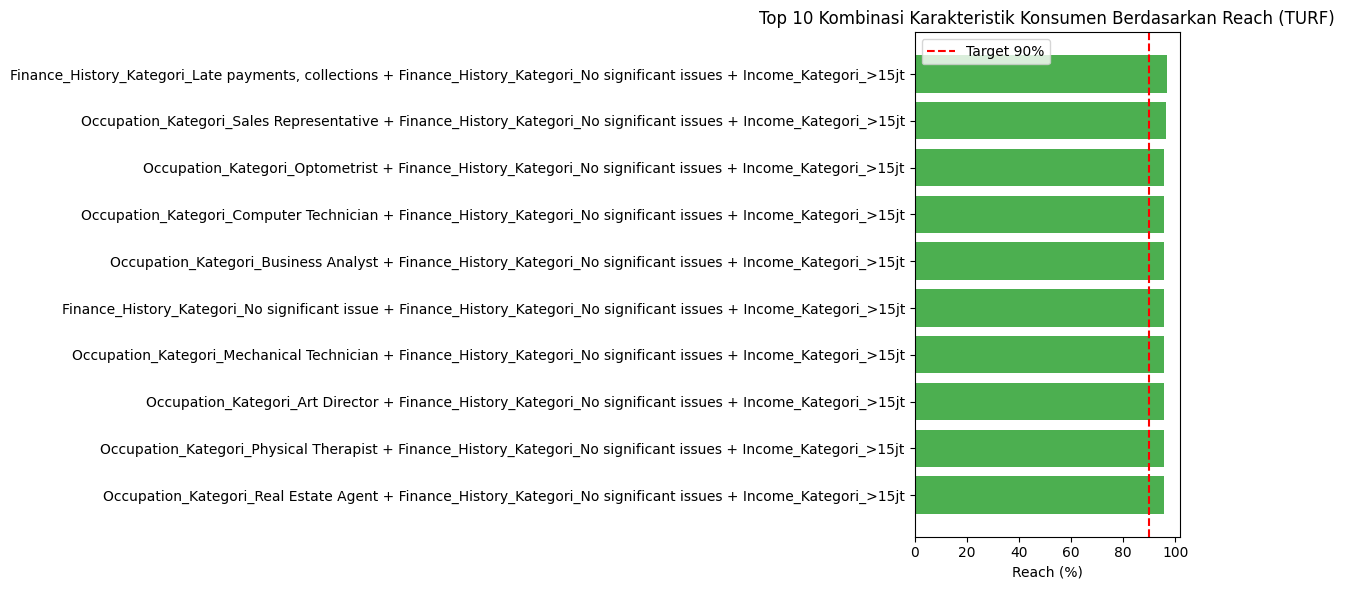

✅ Kombinasi terbaik menjangkau 97.01% konsumen untuk membeli mobil.

📌 Rekomendasi Kombinasi Terbaik:
1. Reach: 97.01% - Fitur: Finance_History_Kategori_Late payments, collections, Finance_History_Kategori_No significant issues, Income_Kategori_>15jt
2. Reach: 96.35% - Fitur: Occupation_Kategori_Sales Representative, Finance_History_Kategori_No significant issues, Income_Kategori_>15jt
3. Reach: 95.68% - Fitur: Occupation_Kategori_Optometrist, Finance_History_Kategori_No significant issues, Income_Kategori_>15jt
4. Reach: 95.68% - Fitur: Occupation_Kategori_Computer Technician, Finance_History_Kategori_No significant issues, Income_Kategori_>15jt
5. Reach: 95.68% - Fitur: Occupation_Kategori_Business Analyst, Finance_History_Kategori_No significant issues, Income_Kategori_>15jt
6. Reach: 95.68% - Fitur: Finance_History_Kategori_No significant issue, Finance_History_Kategori_No significant issues, Income_Kategori_>15jt
7. Reach: 95.68% - Fitur: Occupation_Kategori_Mechanical Technician,

In [32]:
# @title TURF Analysis: Kombinasi Karakteristik Konsumen Potensial dalam Pembelian Mobil
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

# --- Parameter ---
file_path = "/content/df_bersih.csv"  # @param {type:"string"}
Target_dalam_persen = 90  # @param {type:"number"}
Maksimal_Kombinasi_Fitur = 3  # @param {type:"integer"}

# --- Baca dan siapkan data ---
df = pd.read_csv(file_path, delimiter=";")
df['Car'] = df['Car'].map({'Yes': 1, 'No': 0})

# --- Buat kolom kategorikal ---
df['Occupation_Kategori'] = df['Occupation'].astype('category')
df['Finance_History_Kategori'] = df['Finance History'].astype('category')
df['Income_Kategori'] = pd.cut(
    df['Monthly Income'],
    bins=[0, 5, 10, 15, float('inf')],
    labels=['<5jt', '5-10jt', '10-15jt', '>15jt']
)

# --- Validasi data ---
if df['Car'].sum() == 0:
    raise SystemExit("❌ Tidak ada konsumen yang membeli mobil (Car == Yes). Program dihentikan.")

# --- One-hot encoding ---
fitur_kategorikal = ['Occupation_Kategori', 'Finance_History_Kategori', 'Income_Kategori']
df_encoded = pd.get_dummies(df[fitur_kategorikal], prefix=fitur_kategorikal)
df_encoded['Car'] = df['Car']

# --- Fungsi TURF ---
def turf_analysis(data, target_col, max_kombinasi):
    hasil = []
    fitur = [col for col in data.columns if col != target_col]
    for r in range(1, max_kombinasi + 1):
        for combo in combinations(fitur, r):
            reach_mask = data[list(combo)].any(axis=1)
            reach_count = data[reach_mask][target_col].sum()
            reach_percent = reach_count / data[target_col].sum()
            hasil.append({
                'Fitur Kombinasi': combo,
                'Jumlah Fitur': r,
                'Reach (jumlah)': reach_count,
                'Reach (%)': round(reach_percent * 100, 2)
            })
    return pd.DataFrame(hasil).sort_values(by='Reach (%)', ascending=False).reset_index(drop=True)

# --- Jalankan analisis TURF ---
hasil_turf = turf_analysis(df_encoded, target_col='Car', max_kombinasi=Maksimal_Kombinasi_Fitur)

# --- Visualisasi ---
top_items = hasil_turf.head(10)
plt.figure(figsize=(12, 6))
plt.barh(range(len(top_items)), top_items['Reach (%)'], color="#4caf50")
plt.yticks(range(len(top_items)), [' + '.join(item) for item in top_items['Fitur Kombinasi']])
plt.xlabel("Reach (%)")
plt.title("Top 10 Kombinasi Karakteristik Konsumen Berdasarkan Reach (TURF)")
plt.axvline(Target_dalam_persen, color='red', linestyle='--', label=f"Target {Target_dalam_persen}%")
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('turf_konsumen_mobil.png')
plt.show()

# --- Output ---
top_combo = top_items.iloc[0]
if top_combo['Reach (%)'] >= Target_dalam_persen:
    print(f"✅ Kombinasi terbaik menjangkau {top_combo['Reach (%)']}% konsumen untuk membeli mobil.")
else:
    print(f"❌ Kombinasi terbaik hanya menjangkau {top_combo['Reach (%)']}% pembeli mobil. Belum mencapai target.")

print("\n📌 Rekomendasi Kombinasi Terbaik:")
for i, row in top_items.iterrows():
    print(f"{i+1}. Reach: {row['Reach (%)']}% - Fitur: {', '.join(row['Fitur Kombinasi'])}")


#Interpretasi Output Top 10 Kombinasi Karakteristik Konsumen Potensial dalam Pembelian Mobil

Berdasarkan output dari data pemilik mobil  didapatkan bahwa kombinasi terbaik untuk menjangkau 97,01% konsumen dalam membeli mobil dapat dilihat dari keriteria yang memiliki keuangan berkategori collections, tidak signifikan,  hanya telat melakukan pembayaran kredit sebelumnya dan memiliki pendapatan perbulan lebih dari 15 juta  .

Diikuti dengan 96,35% konsumen berkriteria memiliki kategori dalam pekerjaannya Sales Representative, kategori finansialnya itu memilik isu tidak signifikan dan pendapatan perbulannya itu lebih dari 15 juta

Di urutan ketiga didapatkan untuk mendapatkan kombinasi terbaik dalam menjangkau pelannggan sebanyak 95,68% konsumen agar membeli mobil atau mengkredit kembali memiliki kriteria miliki pekerjaan sebagai Optometris yaitu seorang profesional kesehatan yang fokus pada pemeriksaan mata, memiliki isu keuangan yang tidak signifikan dan pendapatannya pula lebih dari 15 juta perbulan

berdasarkan ketiga persetntasi dalam menjangkau konsumen dalam menawarkan mobil kembali secara cash atau kredit dapat dilihat dari dua karakteristik konsumen seperti riwayat keuangan dalam membayar cicilan sebelumnya dan pendapatan perbulan yang dimiliki oleh konsumen. Dikarenakan berdasarkan data sebelumnya jika konsumen memiliki kedua karakteristik tersebut konsumen dapat membeli mobil tersebut atau dapat membayar cicilan mobil tersebut hingga lunas. Memungkinkan untuk mereka jika ditawarkan kembali mereka akan mengambilnya sehingga dapat menjangkau konsumen untuk membeli mobil atau mencicilnya kembali.

kedua karakteristik tersebut juga dapat dilakukan untuk konsumen baru apakah mereka layak untuk diberikan kepercayaan kredit mobil tersebut berdasarkan kedua kriteria tersebut dikarenakan lebih dari 98% konsumen terdahulu dapat menyelesaikan kreditnya
